
# Lab 5: EKG Heartbeat Sensor (RC Filters)

In this lab, the signal from an EKG heartbeat sensor was read after two amplifications. In both stages, hardware filters were needed to 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


## Hardware Setup

The signals from the EKG sensor were on the mV level, so it had to be fed through two op-amps to generate a readable signal. 

![img](img/circuit.png)

Before each op-amp, a series of RC and CR filters were used to tune out noise on each level. These were used to ensure that the signal coming through was as clean as possible, given that a reasonable heartbeat would be within the 500mHz to 2 Hz range.

## Raw EKG Data

Unfortunately, the data taken from my wrists were not super pronounced, my guess is that the placement of the EKG pads were not optimal. Instead, I plugged Aydin's wrists into my circuit, which produced much cleaner results.

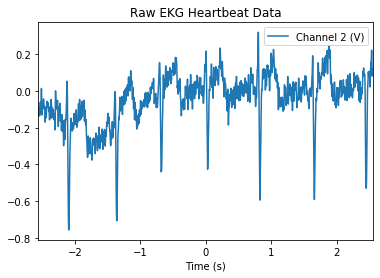

In [8]:
# Raw EKG Data
raw_ekg_data = pd.read_csv('data/aydin_pulse.csv')  
# Aydin's pulse was much more obvious than mine-- I'm using data from when I hooked Aydin into my circuit

raw_ekg_data.plot(x='Time (s)', y=['Channel 2 (V)'], title='Raw EKG Heartbeat Data')

## Bode Plot
Using the Analog Discovery's Network Analyzer tool, a Bode plot was generated to characterize the noise of the system over different base frequencies.

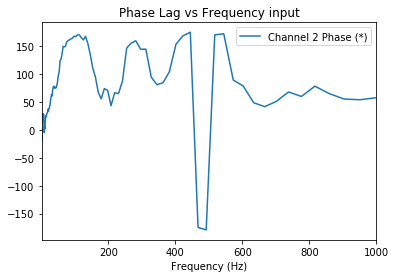

In [12]:
# Read Bode data
bode_data = pd.read_csv('data/bode_plot_2.csv')

bode_data.plot('Frequency (Hz)', 'Channel 2 Phase (*)', title='Phase Lag vs Frequency input')

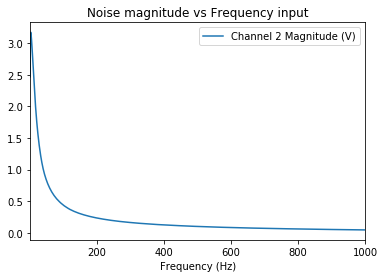

In [15]:
bode_data.plot('Frequency (Hz)', 'Channel 2 Magnitude (V)', title='Noise magnitude vs Frequency input')

### Bode Plot Analysis

This Bode plot clearly shows the noise level drastically decreasing as the frequency rose. This is consistent with the desired behavior of the circuit, to filter out high frequency noise (5+ Hz) and passing through low frequency noise (1-5 Hz).